### Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read Data

In [2]:
df = pd.read_csv('./data/song_data.csv')
df

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


In [3]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

### Duplicates

In [6]:
df.duplicated().sum()

np.int64(3909)

In [7]:
df[df.duplicated()]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
173,Sex on Fire,81,203346,0.00172,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374
179,Use Somebody,79,230760,0.00552,0.276,0.715,0.000417,0,0.2010,-5.356,1,0.0432,137.028,4,0.173
212,Hips Don't Lie,84,218093,0.28400,0.778,0.824,0.000000,10,0.4050,-5.892,0,0.0712,100.024,4,0.756
414,Hotel California - Remastered,83,391376,0.00574,0.579,0.508,0.000494,2,0.0575,-9.484,1,0.0270,147.125,4,0.609
421,Me and Bobby McGee,69,271333,0.30200,0.453,0.464,0.000060,2,0.1520,-10.960,1,0.0431,93.190,4,0.658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18797,The Time I've Wasted,63,213249,0.79600,0.473,0.250,0.000088,5,0.1010,-11.263,1,0.0304,145.027,4,0.261
18811,Oceans,69,216186,0.27400,0.404,0.480,0.000009,9,0.1320,-8.906,0,0.0303,129.162,3,0.200
18817,Life Is Confusing,64,171413,0.95500,0.373,0.216,0.001050,1,0.0739,-11.410,1,0.0326,129.030,4,0.496
18826,Call It Dreaming,67,231760,0.61000,0.519,0.515,0.000057,5,0.1070,-9.448,1,0.0310,80.329,4,0.714


In [8]:
df.drop_duplicates(keep='first', inplace=True)

In [9]:
df.drop(columns=['song_name'], axis=1, inplace=True)

### Analysis

In [10]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,1.492600e+04,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,48.750904,2.189496e+05,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967
std,20.379465,6.234080e+04,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.839435e+05,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000
50%,52.000000,2.118455e+05,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000
75%,63.750000,2.447200e+05,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


### Correlation Analysis

<Axes: >

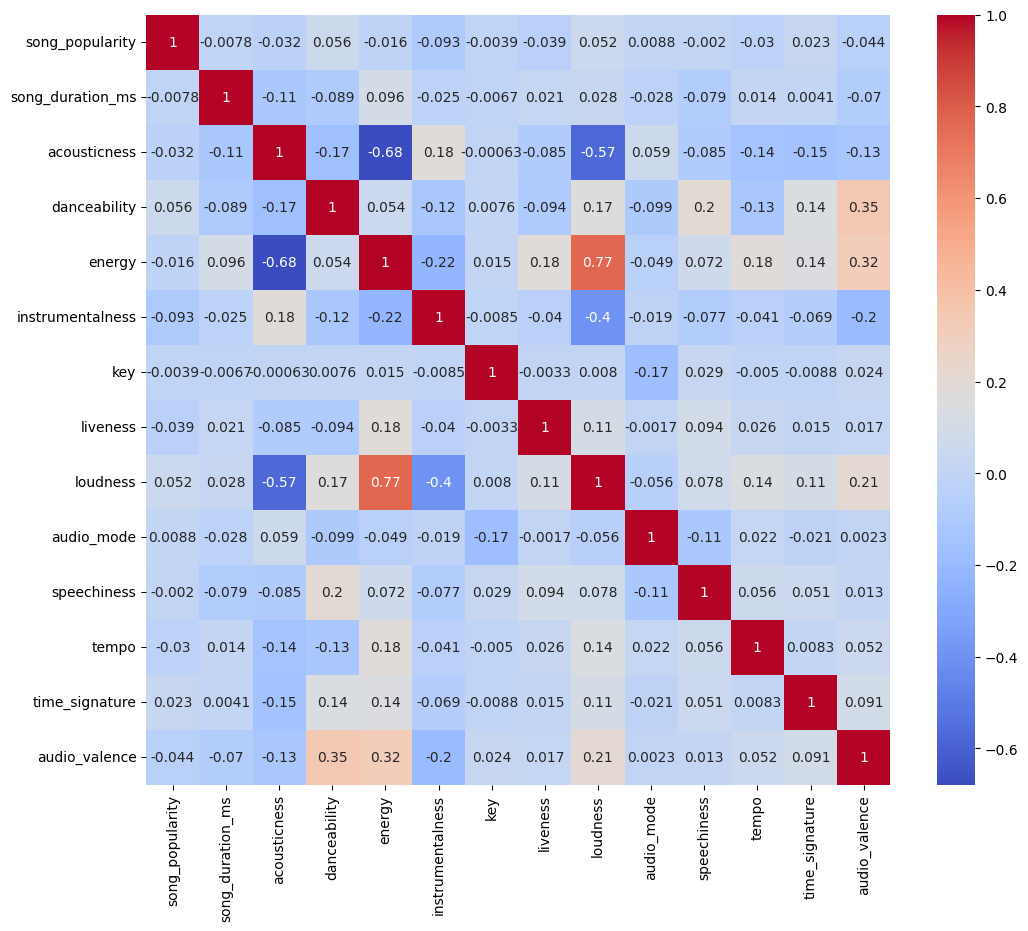

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [12]:
df.reset_index(drop=True, inplace=True)

### Scaling

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop(columns=['song_popularity'], axis=1))

In [14]:
df_scaled = pd.concat([pd.DataFrame(x_scaled), df[['song_popularity']]], axis=1)
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,song_popularity
0,0.695931,-0.888716,-0.812989,0.190474,-0.382783,0.751246,-0.837637,0.891427,0.763207,-0.676232,1.582272,0.14851,-0.213794,73
1,-0.032349,-0.872681,-0.521989,0.961617,-0.382905,-0.640544,-0.499233,0.316093,-1.310260,-0.479212,-0.545696,0.14851,-0.633572,66
2,0.205064,-0.879827,0.711600,-0.797130,1.476165,-1.475618,0.513914,-0.037518,0.763207,-0.195270,0.095580,0.14851,-0.819243,76
3,-0.032349,-0.818674,-1.097663,1.489242,-0.368141,-1.475618,-0.540585,0.681649,0.763207,0.073218,0.046103,0.14851,-1.327821,74
4,0.078225,-0.904033,-1.122968,0.569281,-0.382905,1.307962,-0.464772,0.650046,0.763207,-0.657882,1.752740,0.14851,0.189839,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,-0.951328,2.088335,-0.787685,-2.204127,-0.382633,1.586320,-0.478556,-2.097722,0.763207,-0.624080,-0.245699,0.14851,-0.916115,60
14922,-0.213087,1.658959,-0.819315,-2.159031,-0.382900,1.586320,-0.519909,-1.592811,-1.310260,-0.669471,-0.923403,0.14851,-1.057387,60
14923,-0.589338,1.934028,0.597730,-1.419456,-0.382905,-1.475618,-0.382066,-1.130951,0.763207,-0.617319,0.324649,0.14851,-0.972624,23
14924,2.138806,2.262769,-0.863598,-1.414946,-0.317609,-0.640544,-0.423419,-1.080684,0.763207,-0.643395,-0.517910,0.14851,-0.823280,55


<Axes: xlabel='song_popularity', ylabel='Count'>

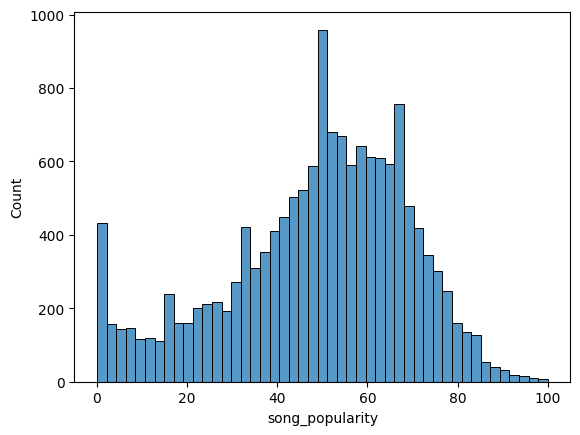

In [15]:
sns.histplot(df_scaled['song_popularity'])

Using Yeo-Johnson transformation on target column to scale

In [16]:
transformer = PowerTransformer(method='yeo-johnson')
df['song_popularity'] = transformer.fit_transform(df[['song_popularity']])

### Save Dataframe

In [17]:
df_scaled.to_csv("./data/transformed_data.csv", index=False)